In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import sys
sys.path.append('/content/gdrive/My Drive/JL-ML_colab_code')



In [1]:
from models.load_premade import load_premade_model
from tensorflow import keras
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test = np.expand_dims(x_test, -1).astype("float32") / 255

print(x_train.shape)

(60000, 28, 28, 1)


In [2]:
input_shape = x_train.shape[1:]
latent_dim = 2

model = load_premade_model(model_type = "autoencoder", model_name = "dense", 
                           input_shape=input_shape, 
                           latent_dim=latent_dim)

In [3]:
output = model(x_test)

In [4]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy)

epochs = 10
batch_size = 32
history = model.fit(x_train, x_train, validation_data=(x_test, x_test), 
                    epochs=epochs, batch_size=batch_size)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2248 - val_loss: 0.2060
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2020 - val_loss: 0.1983
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1964 - val_loss: 0.1950
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1934 - val_loss: 0.1922
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1913 - val_loss: 0.1903
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1897 - val_loss: 0.1892
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1885 - val_loss: 0.1882
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1876 - val_loss: 0.1872
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1868 - val_loss: 0.1869
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.186

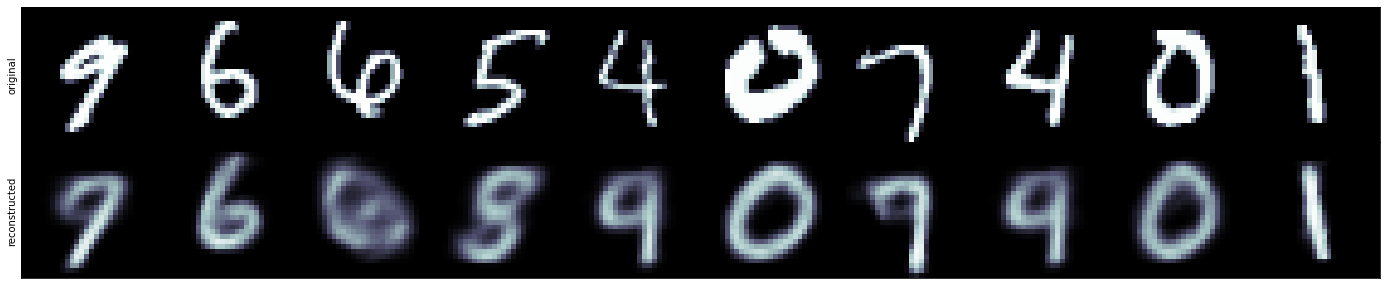

In [5]:
import importlib
import visual
importlib.reload(visual)
from visual.plot_utils import plot_mnist_comparison, plot_2d_scatter


original = x_test[20:30, :, :, :]
decoded = model(original)

plot_mnist_comparison((original, decoded), figsize=(28, 5), row_labels=['original', 'reconstructed'])

tf.Tensor(
[[ 3.7828362e+01  2.1741600e+01]
 [-7.6842368e-02 -2.2620814e+00]
 [ 9.8334656e+01 -3.2056992e+01]
 ...
 [ 1.8699255e+01  8.8020010e+00]
 [ 2.1719240e+01  1.8175914e+00]
 [ 6.2184873e+00 -2.5411018e+01]], shape=(10000, 2), dtype=float32)


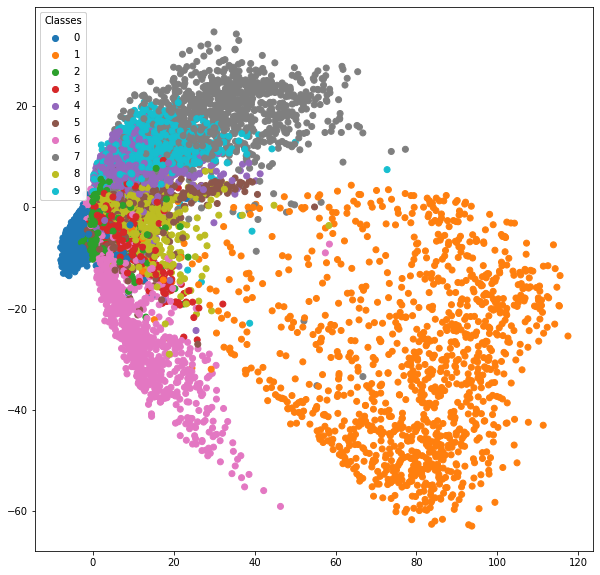

<class 'NoneType'>


In [6]:
import matplotlib.pyplot as plt
encoded = model.encode(x_test)
print(encoded)

a = plot_2d_scatter(encoded, y_test)
print(type(a))

(10, 2)
[[ -2.75336567  -9.31561471]
 [  0.74072424  19.89367409]
 [ -7.13459189  31.36405275]
 [  8.57651911 -31.94597024]
 [ 15.28328095  13.17592189]
 [ 21.05288996  58.91038529]
 [-10.06107803  46.95187157]
 [ 12.53781275  68.18155644]
 [-24.78753962  27.10577405]
 [ 17.33843777  20.45797893]]


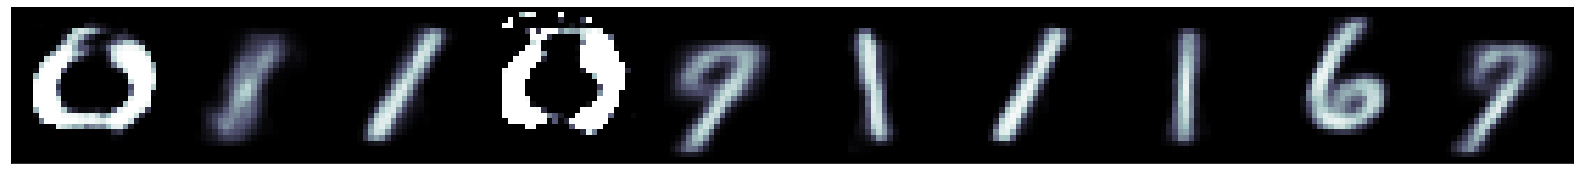

In [8]:
# random points

encoded_mean = np.mean(encoded, axis=0)
encoded_cov = np.cov(encoded.numpy().T)

random_points = np.random.multivariate_normal(encoded_mean, encoded_cov, size=10)
print(np.shape(random_points))
print(random_points)

decoded_random = model.decoder(random_points)

plot_mnist_comparison((decoded_random,), figsize=(28, 5))

(10000, 2)
(10, 2)
tf.Tensor([ 7  2  1 ... 11 11 11], shape=(10010,), dtype=uint8)


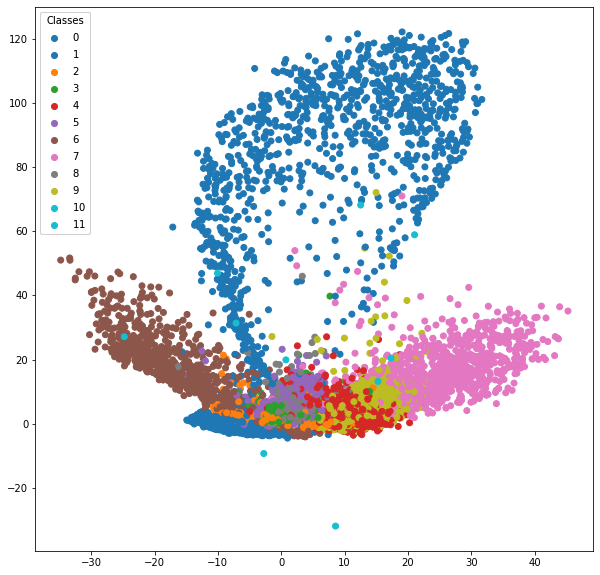

In [9]:
# plot test set and randomly sampled
print(encoded.shape)
print(random_points.shape)

encoded_and_random = tf.concat([encoded, random_points], 0)

random_labels = 11*np.ones(len(random_points))
encoded_and_random_labels = tf.concat([y_test, random_labels], 0)
print(encoded_and_random_labels)

plot_2d_scatter(encoded_and_random.numpy(), encoded_and_random_labels.numpy())

In [11]:
images = model(x_test)
from visual.sample_scatter_gui import SampleScatterGUI
%matplotlib

print(images.shape)
print(y_test.shape)


gui = SampleScatterGUI(encoded.numpy(), y_test, images[:,:,:,0])

Using matplotlib backend: Qt5Agg
(10000, 28, 28, 1)
(10000,)


Traceback (most recent call last):
  File "C:\Users\Lukas\Anaconda3\envs\JL-ML\lib\site-packages\matplotlib\cbook\__init__.py", line 224, in process
    func(*args, **kwargs)
  File "c:\Users\Lukas\Desktop\VSCode Project\JL-ML\JL-ML\src\visual\sample_scatter_gui.py", line 66, in button_press_callback
    self.current_index = self.get_closest_index(x)
  File "c:\Users\Lukas\Desktop\VSCode Project\JL-ML\JL-ML\src\visual\sample_scatter_gui.py", line 88, in get_closest_index
    d = np.sum(np.power(self.latent_projection-x,2),1)
TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'
